# Chapter 3 : Neural Network

In [1]:
import numpy as np
import matplotlib.pylab as plt

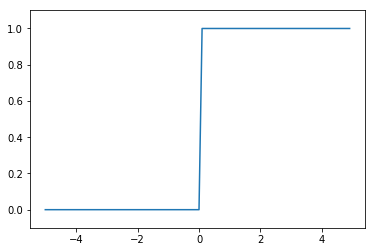

In [14]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


In [22]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

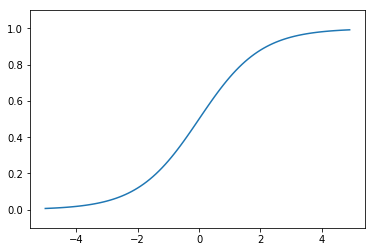

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [17]:
def relu(x):
    np.maximum(0, x)

In [20]:
B = np.array([[1,2], [3,4], [5,6]])

np.ndim(B)
B.shape

(3, 2)

In [23]:
A = np.array([[1,2], [3,4]])
A.shape
B = np.array([[5,6], [7,8]])
B.shape
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [30]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)

print(X)
print(W)
print(Y)

[1 2]
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


### 3depth neural network

A = XW + B

In [35]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [40]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


In [42]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


In [48]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[ 0.31682708  0.69627909]


### softmax function

1. 각각의 지수함수를 구한다
2. 지수 함수의 합
3. 각각의 지수함수를 합으로 나눈다
4. overflow 문제를 해결하기 위해 C(최대값)을 취한다

In [11]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [24]:
def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a - C)
    exp_sum_a = np.sum(exp_a)
    y = exp_a / exp_sum_a
    
    return y

In [15]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 0.01821127  0.24519181  0.73659691]


1.0

In [8]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [10]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [12]:
import sys, os
sys.path.append(os.pardir)
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### MNIST

In [20]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [25]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [29]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
